# ARTIFICIAL NEURAL NETWORKS.
## Classification Using Artificial Neural Networks with Hyperparameter Tuning on Alphabets Data.

In this assignment, you will be tasked with developing a classification model using Artificial Neural Networks (ANNs) to classify data points from the "Alphabets_data.csv" dataset into predefined categories of alphabets. This exercise aims to deepen your understanding of ANNs and the significant role hyperparameter tuning plays in enhancing model performance.

### Dataset: "Alphabets_data.csv"
The dataset provided, "Alphabets_data.csv", consists of labeled data suitable for a classification task aimed at identifying different alphabets. Before using this data in your model, you'll need to preprocess it to ensure optimal performance.


### Task-1 Data Exploration and Preprocessing :
1. Begin by loading and exploring the "Alphabets_data.csv" dataset. Summarize its key features such as the number of samples, features, and classes.
2. Execute necessary data preprocessing steps including data normalization, managing missing values.


In [4]:
# Import the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv('Alphabets_data.csv')
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [10]:
# Summary Statistics.
data.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [12]:
# Checking for Missing Values.
data.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [14]:
data.dtypes

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

In [18]:
f1=data.iloc[:,0:16]
forest=pd.concat([f1,data['yedgex']],axis=1)
forest

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


<Axes: xlabel='width', ylabel='height'>

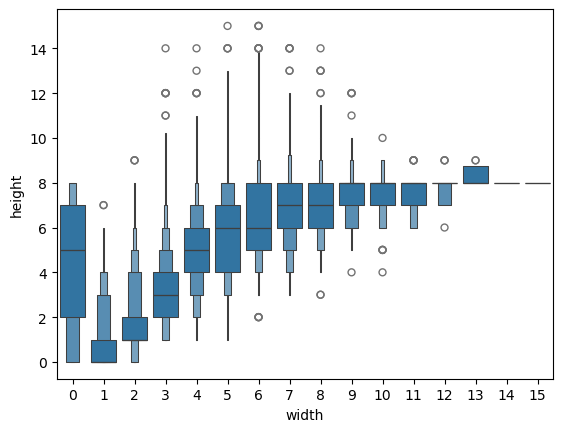

In [20]:
sns.boxenplot(x='width',y='height',data=f1)

C:\Users\khale\AppData\Local\Temp\ipykernel_6424\3578857044.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(f1['letter'],palette="Set2")


<Axes: xlabel='count', ylabel='letter'>

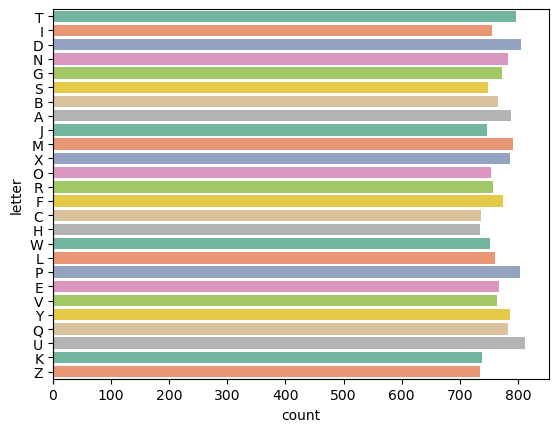

In [24]:
sns.countplot(f1['letter'],palette="Set2")

In [26]:
# Split into features (X) and target label (y).
X=data.drop('letter',axis=1)
Y=data['letter']

In [36]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
# Encode the target variable.
le=LabelEncoder()
y_encoded=le.fit_transform(Y)

In [38]:
y_encoded

array([19,  8,  3, ..., 19, 18,  0])

In [40]:
# Normalize the features (X) using StandardScaler.
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

### Task-2 Model Implementation
1. Construct a basic ANN model using your chosen high-level neural network library. Ensure your model includes at least one hidden layer.
2. Divide the dataset into training and test sets.
3. Train your model on the training set and then use it to make predictions on the test set.


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [45]:
# Split into training and test sets.
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_encoded,test_size=0.2,random_state=42)

In [47]:
# Building the ANN model.
model=Sequential()
model.add(Dense(units=64,activation='relu',input_shape=(X_train.shape[1],)))   # Input layer.
model.add(Dense(units=32,activation='relu'))       # Hidden layer1
model.add(Dense(units=16,activation='relu'))       # Hidden layer2
model.add(Dense(units=len(le.classes_),activation='softmax'))   # Output layer.

C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [51]:
# Training the model.
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),batch_size=32)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2594 - loss: 2.5254 - val_accuracy: 0.6655 - val_loss: 1.0946
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7101 - loss: 0.9847 - val_accuracy: 0.7707 - val_loss: 0.7837
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7882 - loss: 0.7290 - val_accuracy: 0.8133 - val_loss: 0.6446
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8171 - loss: 0.6189 - val_accuracy: 0.8355 - val_loss: 0.5683
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8371 - loss: 0.5469 - val_accuracy: 0.8482 - val_loss: 0.5157
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8563 - loss: 0.4788 - val_accuracy: 0.8602 - val_loss: 0.4599
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8729 - loss: 0.4308 - val_accuracy: 0.8727 - val_loss: 0.4199
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8791 - loss: 0.4022 - val_accuracy: 0.

In [53]:
# Evaluation of the model.
test_loss,test_accuracy=model.evaluate(X_test,y_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9210 - loss: 0.2399


In [55]:
test_loss

0.2386423796415329

In [57]:
test_accuracy

0.9237499833106995

In [60]:
# Convert the Series Y to a NumPy array.
Y=Y.to_numpy()

In [62]:
Y=le.fit_transform(Y)

In [64]:
# evaluate the model
scores=model.evaluate(X,Y)
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0433 - loss: 82.1020
compile_metrics: 4.30%


In [66]:
model.metrics_names

['loss', 'compile_metrics']

In [68]:
scores

[82.07266235351562, 0.0430000014603138]

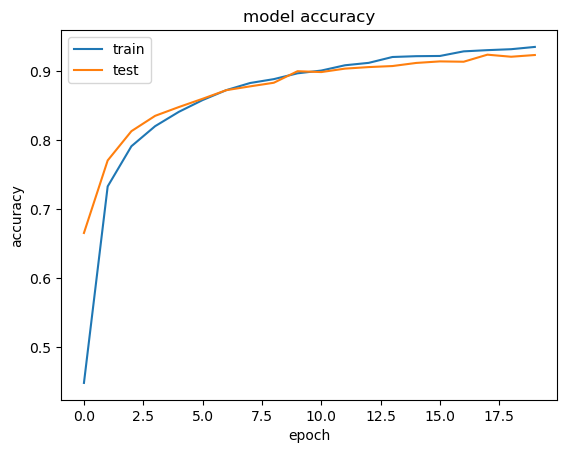

In [70]:
# Summarize history for accuracy.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

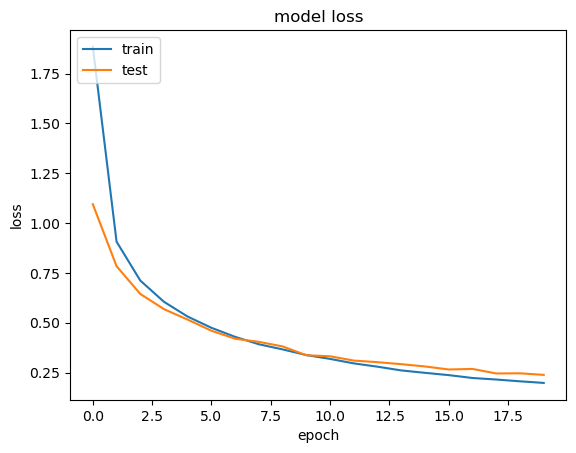

In [72]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

### Task-3 Hyperparameter Tuning
1. Modify various hyperparameters, such as the number of hidden layers, neurons per hidden layer, activation functions, and learning rate, to observe their impact on model performance.
2. Adopt a structured approach like grid search or random search for hyperparameter tuning, documenting your methodology thoroughly.


In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [78]:
# Standardization
a=StandardScaler()
a.fit(X)
X_standardized=a.transform(X)
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04
mean,-1.030287e-16,3.659295e-17,-8.242296e-17,1.417533e-16,-1.003642e-16,1.104894e-16,4.156675e-17,1.747935e-16,-6.181722e-17,4.440892e-17,9.947598e-17,-1.083578e-16,-1.598721e-18,-4.732215e-16,6.039613e-17,1.790568e-16
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-2.103087e+00,-2.129084e+00,-2.542463e+00,-2.375788e+00,-1.600550e+00,-3.404567e+00,-3.225590e+00,-1.714360e+00,-2.175206e+00,-3.328246e+00,-2.453056e+00,-3.810980e+00,-1.305948e+00,-5.391438e+00,-1.438153e+00,-4.823208e+00
25%,-5.350039e-01,-6.159833e-01,-5.568812e-01,-6.069205e-01,-6.874762e-01,-4.430438e-01,-6.452728e-01,-6.032074e-01,-4.950723e-01,-5.152079e-01,-5.526407e-01,-4.465129e-01,-8.772199e-01,-2.190816e-01,-6.590356e-01,-4.953539e-01
50%,-1.230945e-02,-1.074302e-02,-6.048579e-02,2.775132e-01,-2.309392e-01,5.054332e-02,-2.152199e-01,-2.328234e-01,-7.503896e-02,-1.133453e-01,-1.725577e-01,3.412531e-02,-1.976435e-02,-2.190816e-01,-2.694771e-01,1.229111e-01
75%,5.103850e-01,5.944973e-01,4.359097e-01,7.197301e-01,6.821347e-01,5.441305e-01,6.448857e-01,5.079447e-01,7.650277e-01,6.903799e-01,5.876083e-01,5.147635e-01,4.089634e-01,4.274629e-01,5.096399e-01,7.411760e-01
max,5.737329e+00,2.410218e+00,4.903469e+00,4.257465e+00,5.247504e+00,3.999240e+00,3.225203e+00,3.841401e+00,4.125295e+00,2.699693e+00,3.248189e+00,3.398593e+00,5.124969e+00,4.306730e+00,4.405225e+00,4.450766e+00


In [80]:
def create_model():
    model=Sequential()
    model.add(Dense(15,input_dim=11,init='uniform',activation='relu'))
    model.add(Dense(11,init='uniform',activation='relu'))
    model.add(Dense(26,init='uniform',activation='softmax'))

    adam=Adam(lr=0.01)
    model.compile(loss='sparse_categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model

In [82]:
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=40,epochs=10)

##### Batch Size and Epochs.

In [85]:
# Create model.
model=Sequential()
model.add(Dense(14,input_dim=16,activation='relu'))        # 1st layer
model.add(Dense(11,activation='relu'))                     # 2nd layer
model.add(Dense(26,activation='softmax'))                  # 3rd layer
# Compile model.
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# Fit the model.
# Use X_train and y_train, which are the scaled and encoded data for training.
history=model.fit(X_train,y_train,validation_split=0.33,epochs=20,batch_size=10)

Epoch 1/20


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1072/1072 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1378 - loss: 2.9852 - val_accuracy: 0.4168 - val_loss: 1.8835
Epoch 2/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4737 - loss: 1.6877 - val_accuracy: 0.5728 - val_loss: 1.4495
Epoch 3/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5947 - loss: 1.3625 - val_accuracy: 0.6254 - val_loss: 1.2715
Epoch 4/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6252 - loss: 1.2301 - val_accuracy: 0.6495 - val_loss: 1.1591
Epoch 5/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6707 - loss: 1.0918 - val_accuracy: 0.6788 - val_loss: 1.0663
Epoch 6/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6897 - loss: 1.0305 - val_accuracy: 0.7088 - val_loss: 0.9998
Epoch 7/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7122 - loss: 0.9516 - val_accuracy: 0.7144 - val_loss: 0.9599
Epoch 8/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7210 - loss: 0.9170 - val_accurac

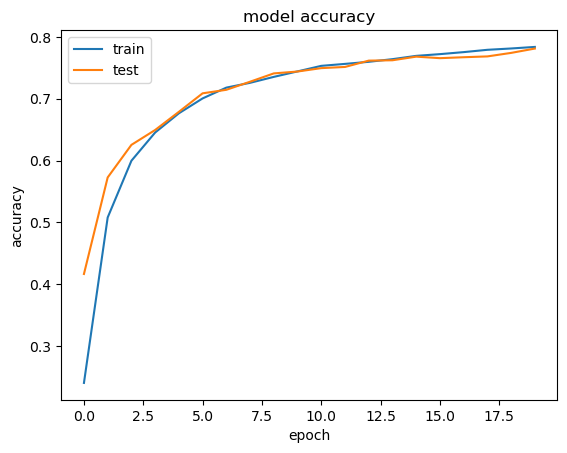

In [87]:
# Summarize history for accuracy.
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

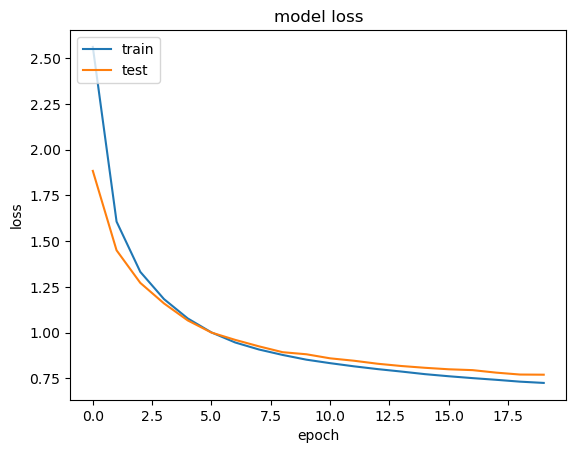

In [89]:
# Summarize history for loss.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

##### Learning rate and Drop out rate.

In [95]:
# Define the model
from keras.layers import Dropout
def create_model(learning_rate=0.001,dropout_rate=0.0):
    model=Sequential()
    model.add(Dense(11,input_dim=16,kernel_initializer='normal',activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(14,kernel_initializer='normal',activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(26,activation='softmax'))     # Binary classification.
    adam = Adam(learning_rate=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [97]:
# Create the KerasClassifier with placeholder arguments for GridSearchCV.
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=40,epochs=50)

In [99]:
# Define the grid search parameters.
learning_rate=[0.001,0.01,0.1]
dropout_rate=[0.0,0.1,0.2]

In [101]:
param_grids = {'model__learning_rate':learning_rate,'model__dropout_rate':dropout_rate}

In [113]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [115]:
# Build and fit the GridSearchCV
grid=GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(),verbose=10)

In [117]:
# Fit the grid search.
grid_result=grid.fit(X_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START model__dropout_rate=0.0, model__learning_rate=0.001.........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 1/9] END model__dropout_rate=0.0, model__learning_rate=0.001;, score=0.803 total time=  29.9s
[CV 2/5; 1/9] START model__dropout_rate=0.0, model__learning_rate=0.001.........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 1/9] END model__dropout_rate=0.0, model__learning_rate=0.001;, score=0.799 total time=  29.5s
[CV 3/5; 1/9] START model__dropout_rate=0.0, model__learning_rate=0.001.........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 1/9] END model__dropout_rate=0.0, model__learning_rate=0.001;, score=0.795 total time=  29.3s
[CV 4/5; 1/9] START model__dropout_rate=0.0, model__learning_rate=0.001.........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 1/9] END model__dropout_rate=0.0, model__learning_rate=0.001;, score=0.807 total time=  28.3s
[CV 5/5; 1/9] START model__dropout_rate=0.0, model__learning_rate=0.001.........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 1/9] END model__dropout_rate=0.0, model__learning_rate=0.001;, score=0.782 total time=  28.8s
[CV 1/5; 2/9] START model__dropout_rate=0.0, model__learning_rate=0.01..........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 2/9] END model__dropout_rate=0.0, model__learning_rate=0.01;, score=0.828 total time=  28.4s
[CV 2/5; 2/9] START model__dropout_rate=0.0, model__learning_rate=0.01..........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 2/9] END model__dropout_rate=0.0, model__learning_rate=0.01;, score=0.781 total time=  28.9s
[CV 3/5; 2/9] START model__dropout_rate=0.0, model__learning_rate=0.01..........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 2/9] END model__dropout_rate=0.0, model__learning_rate=0.01;, score=0.788 total time=  28.9s
[CV 4/5; 2/9] START model__dropout_rate=0.0, model__learning_rate=0.01..........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 2/9] END model__dropout_rate=0.0, model__learning_rate=0.01;, score=0.803 total time=  32.5s
[CV 5/5; 2/9] START model__dropout_rate=0.0, model__learning_rate=0.01..........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 2/9] END model__dropout_rate=0.0, model__learning_rate=0.01;, score=0.784 total time=  35.3s
[CV 1/5; 3/9] START model__dropout_rate=0.0, model__learning_rate=0.1...........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 3/9] END model__dropout_rate=0.0, model__learning_rate=0.1;, score=0.210 total time=  32.7s
[CV 2/5; 3/9] START model__dropout_rate=0.0, model__learning_rate=0.1...........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 3/9] END model__dropout_rate=0.0, model__learning_rate=0.1;, score=0.371 total time=  28.8s
[CV 3/5; 3/9] START model__dropout_rate=0.0, model__learning_rate=0.1...........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 3/9] END model__dropout_rate=0.0, model__learning_rate=0.1;, score=0.273 total time=  31.3s
[CV 4/5; 3/9] START model__dropout_rate=0.0, model__learning_rate=0.1...........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 3/9] END model__dropout_rate=0.0, model__learning_rate=0.1;, score=0.313 total time=  29.2s
[CV 5/5; 3/9] START model__dropout_rate=0.0, model__learning_rate=0.1...........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 3/9] END model__dropout_rate=0.0, model__learning_rate=0.1;, score=0.336 total time=  31.1s
[CV 1/5; 4/9] START model__dropout_rate=0.1, model__learning_rate=0.001.........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 4/9] END model__dropout_rate=0.1, model__learning_rate=0.001;, score=0.730 total time=  33.1s
[CV 2/5; 4/9] START model__dropout_rate=0.1, model__learning_rate=0.001.........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 4/9] END model__dropout_rate=0.1, model__learning_rate=0.001;, score=0.738 total time=  32.8s
[CV 3/5; 4/9] START model__dropout_rate=0.1, model__learning_rate=0.001.........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 4/9] END model__dropout_rate=0.1, model__learning_rate=0.001;, score=0.743 total time=  32.9s
[CV 4/5; 4/9] START model__dropout_rate=0.1, model__learning_rate=0.001.........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 4/9] END model__dropout_rate=0.1, model__learning_rate=0.001;, score=0.753 total time=  31.5s
[CV 5/5; 4/9] START model__dropout_rate=0.1, model__learning_rate=0.001.........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 4/9] END model__dropout_rate=0.1, model__learning_rate=0.001;, score=0.723 total time=  29.8s
[CV 1/5; 5/9] START model__dropout_rate=0.1, model__learning_rate=0.01..........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 5/9] END model__dropout_rate=0.1, model__learning_rate=0.01;, score=0.724 total time=  30.8s
[CV 2/5; 5/9] START model__dropout_rate=0.1, model__learning_rate=0.01..........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 5/9] END model__dropout_rate=0.1, model__learning_rate=0.01;, score=0.739 total time=  32.2s
[CV 3/5; 5/9] START model__dropout_rate=0.1, model__learning_rate=0.01..........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 5/9] END model__dropout_rate=0.1, model__learning_rate=0.01;, score=0.719 total time=  31.7s
[CV 4/5; 5/9] START model__dropout_rate=0.1, model__learning_rate=0.01..........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 5/9] END model__dropout_rate=0.1, model__learning_rate=0.01;, score=0.745 total time=  32.1s
[CV 5/5; 5/9] START model__dropout_rate=0.1, model__learning_rate=0.01..........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 5/9] END model__dropout_rate=0.1, model__learning_rate=0.01;, score=0.720 total time=  29.5s
[CV 1/5; 6/9] START model__dropout_rate=0.1, model__learning_rate=0.1...........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 6/9] END model__dropout_rate=0.1, model__learning_rate=0.1;, score=0.058 total time=  33.0s
[CV 2/5; 6/9] START model__dropout_rate=0.1, model__learning_rate=0.1...........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 6/9] END model__dropout_rate=0.1, model__learning_rate=0.1;, score=0.097 total time=  31.6s
[CV 3/5; 6/9] START model__dropout_rate=0.1, model__learning_rate=0.1...........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 6/9] END model__dropout_rate=0.1, model__learning_rate=0.1;, score=0.078 total time=  30.3s
[CV 4/5; 6/9] START model__dropout_rate=0.1, model__learning_rate=0.1...........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 6/9] END model__dropout_rate=0.1, model__learning_rate=0.1;, score=0.080 total time=  30.0s
[CV 5/5; 6/9] START model__dropout_rate=0.1, model__learning_rate=0.1...........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 6/9] END model__dropout_rate=0.1, model__learning_rate=0.1;, score=0.073 total time=  29.9s
[CV 1/5; 7/9] START model__dropout_rate=0.2, model__learning_rate=0.001.........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 7/9] END model__dropout_rate=0.2, model__learning_rate=0.001;, score=0.718 total time=  30.2s
[CV 2/5; 7/9] START model__dropout_rate=0.2, model__learning_rate=0.001.........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 7/9] END model__dropout_rate=0.2, model__learning_rate=0.001;, score=0.699 total time=  31.3s
[CV 3/5; 7/9] START model__dropout_rate=0.2, model__learning_rate=0.001.........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 7/9] END model__dropout_rate=0.2, model__learning_rate=0.001;, score=0.674 total time=  31.5s
[CV 4/5; 7/9] START model__dropout_rate=0.2, model__learning_rate=0.001.........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 7/9] END model__dropout_rate=0.2, model__learning_rate=0.001;, score=0.710 total time=  30.8s
[CV 5/5; 7/9] START model__dropout_rate=0.2, model__learning_rate=0.001.........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 7/9] END model__dropout_rate=0.2, model__learning_rate=0.001;, score=0.686 total time=  31.5s
[CV 1/5; 8/9] START model__dropout_rate=0.2, model__learning_rate=0.01..........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 8/9] END model__dropout_rate=0.2, model__learning_rate=0.01;, score=0.664 total time=  32.2s
[CV 2/5; 8/9] START model__dropout_rate=0.2, model__learning_rate=0.01..........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 8/9] END model__dropout_rate=0.2, model__learning_rate=0.01;, score=0.689 total time=  30.9s
[CV 3/5; 8/9] START model__dropout_rate=0.2, model__learning_rate=0.01..........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 8/9] END model__dropout_rate=0.2, model__learning_rate=0.01;, score=0.661 total time=  30.8s
[CV 4/5; 8/9] START model__dropout_rate=0.2, model__learning_rate=0.01..........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 8/9] END model__dropout_rate=0.2, model__learning_rate=0.01;, score=0.711 total time=  33.6s
[CV 5/5; 8/9] START model__dropout_rate=0.2, model__learning_rate=0.01..........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 8/9] END model__dropout_rate=0.2, model__learning_rate=0.01;, score=0.668 total time=  32.0s
[CV 1/5; 9/9] START model__dropout_rate=0.2, model__learning_rate=0.1...........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 9/9] END model__dropout_rate=0.2, model__learning_rate=0.1;, score=0.063 total time=  31.6s
[CV 2/5; 9/9] START model__dropout_rate=0.2, model__learning_rate=0.1...........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 9/9] END model__dropout_rate=0.2, model__learning_rate=0.1;, score=0.058 total time=  31.4s
[CV 3/5; 9/9] START model__dropout_rate=0.2, model__learning_rate=0.1...........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 9/9] END model__dropout_rate=0.2, model__learning_rate=0.1;, score=0.074 total time=  31.2s
[CV 4/5; 9/9] START model__dropout_rate=0.2, model__learning_rate=0.1...........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 9/9] END model__dropout_rate=0.2, model__learning_rate=0.1;, score=0.078 total time=  30.9s
[CV 5/5; 9/9] START model__dropout_rate=0.2, model__learning_rate=0.1...........


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 9/9] END model__dropout_rate=0.2, model__learning_rate=0.1;, score=0.069 total time=  30.8s


C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [120]:
# Print the best parameters and result.
print(f"Best Score:{grid_result.best_score_}")
print(f"Best Params:{grid_result.best_params_}")

Best Score:0.79725
Best Params:{'model__dropout_rate': 0.0, 'model__learning_rate': 0.001}


### Task-4 Evaluation :
1. Employ suitable metrics such as accuracy, precision, recall, and F1-score to evaluate your model's performance.
2. Discuss the performance differences between the model with default hyperparameters and the tuned model, emphasizing the effects of hyperparameter tuning.


In [123]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

In [133]:
# Make predictions.
y_pred=grid_result.best_estimator_.predict(X_test)

In [139]:
# Calculating metrics.
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')

In [143]:
print("Accuracy:{:.2f}%".format(accuracy*100))
print("Precision:{:.2f}%".format(precision*100))
print("Recall:{:.2f}%".format(recall*100))
print("F1-Score:{:.2f}%".format(f1*100))
classification_report(y_test,y_pred)

Accuracy:83.43%
Precision:83.71%
Recall:83.43%
F1-Score:83.43%


'              precision    recall  f1-score   support\n\n           0       0.93      0.89      0.91       149\n           1       0.74      0.84      0.79       153\n           2       0.85      0.81      0.83       137\n           3       0.77      0.85      0.81       156\n           4       0.76      0.84      0.80       141\n           5       0.78      0.82      0.80       140\n           6       0.80      0.78      0.79       160\n           7       0.75      0.64      0.69       144\n           8       0.87      0.80      0.83       146\n           9       0.82      0.85      0.84       149\n          10       0.71      0.73      0.72       130\n          11       0.92      0.84      0.88       155\n          12       0.84      0.94      0.89       168\n          13       0.88      0.83      0.85       151\n          14       0.84      0.83      0.83       145\n          15       0.93      0.87      0.90       173\n          16       0.89      0.89      0.89       166\n       